In [1]:
# In this we are predicting how much a customer would spent 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# Import Data
data = pd.read_csv("Ecommerce Customers")

In [3]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:

fig = px.scatter_3d(data, x='Length of Membership', y='Time on App', z='Time on Website')

fig.show()
     

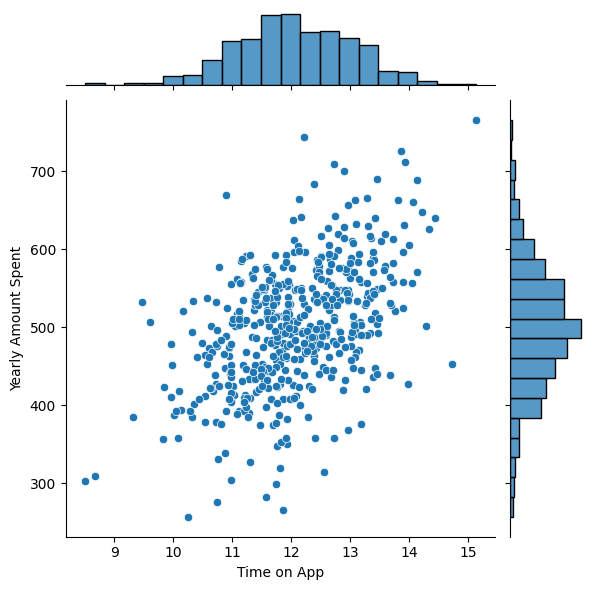

In [6]:
# EDA
sns.jointplot(x="Time on App", y= "Yearly Amount Spent", data =data)

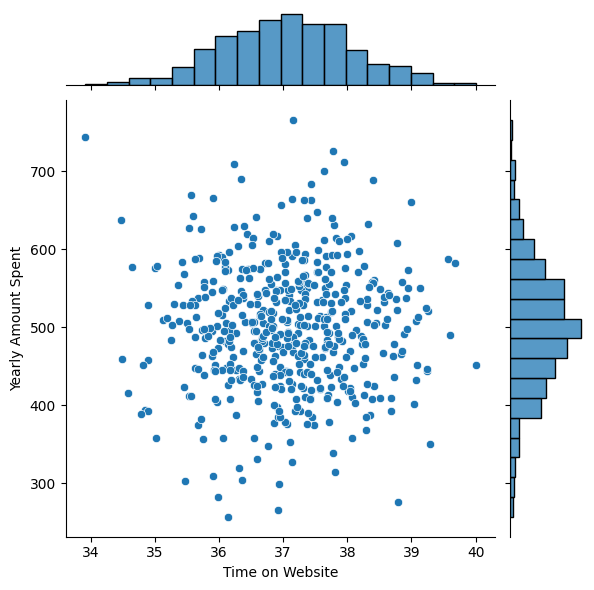

In [7]:
# EDA
sns.jointplot(x="Time on Website", y= "Yearly Amount Spent", data =data)

In [8]:
X = data[["Time on Website","Time on App","Length of Membership"]]
y = data["Yearly Amount Spent"]

In [9]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest, ytrain,ytest = train_test_split(X,y, test_size= 0.3, random_state=40)

In [10]:
from sklearn.linear_model import LinearRegression


In [11]:
lr = LinearRegression()
lr.fit(Xtrain,ytrain)

LinearRegression()

In [12]:

prediction = lr.predict(Xtest)

In [13]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("Mean Absolute Error",mean_absolute_error(ytest,prediction))
print("Mean Squared Error",mean_squared_error(ytest,prediction))
print("R2 score",r2_score(ytest,prediction))

Mean Absolute Error 23.985661421336307
Mean Squared Error 862.943717876646
R2 score 0.8672690959678782


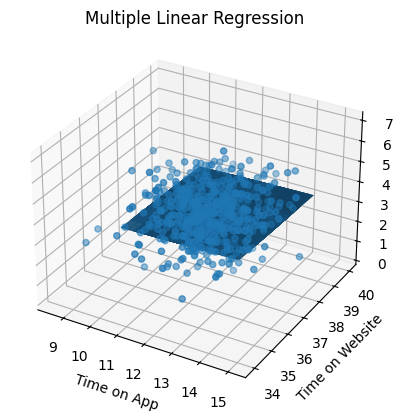

In [14]:
# Define the independent variables
x = data['Time on App']
y = data['Time on Website']
z = data['Length of Membership']


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

# Fit a plane using np.linalg.lstsq
A = np.vstack([x, y, np.ones_like(x)]).T
plane_coef, _, _, _ = np.linalg.lstsq(A, z, rcond=None)

# Create a meshgrid for the plane
xPlane, yPlane = np.meshgrid(x, y)
z_plane = plane_coef[0] * xPlane + plane_coef[1] * yPlane + plane_coef[2]

# Add the regression plane
ax.plot_surface(xPlane, yPlane, z_plane, alpha=0.5)

# Add labels and title
ax.set_xlabel('Time on App')
ax.set_ylabel('Time on Website')
ax.set_zlabel('Median Value of Homes ($1000s)')
plt.title('Multiple Linear Regression')

# Show the plot
plt.show()

In [15]:
fig = px.scatter_3d(data, x='Length of Membership', y='Time on App', z='Time on Website')
fig.add_trace(go.Surface(x = x, y = y, z =z ))
fig.show()
     